The below code is used to import all the vision models fastai has

In [1]:
from fastai.vision.all import *

The below code is getting images from the PETS dataset in fastai

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
def is_cat(x): return x[0].isupper()

1) The ImageDataLoaders says that we are using images as our data
2) valid_pct = 0.2 that is it is creating a 20% validation dataset, even if we dont mention it fastai take 20% default
3) seed = 42, Even though you run the model multiple times the validation set remains the same
4) item_tfms = Resize(224) we are applying tranformation to all the items in the dataset and resizing them to 224 size because historically this has been the best.

In [4]:
dls = ImageDataLoaders.from_name_func(path,get_image_files(path),valid_pct = 0.2,
                                      seed=42,label_func=is_cat,item_tfms=Resize(224))

Here i am creating a learner which takes dls, model and metric we want and it trains the model on the data in dls

In [5]:
learner = vision_learner(dls,resnet34,metrics=error_rate)

In [6]:
learner.fine_tune(1)

In [13]:
is_bird = learner.predict("bird-1394216.jpg")

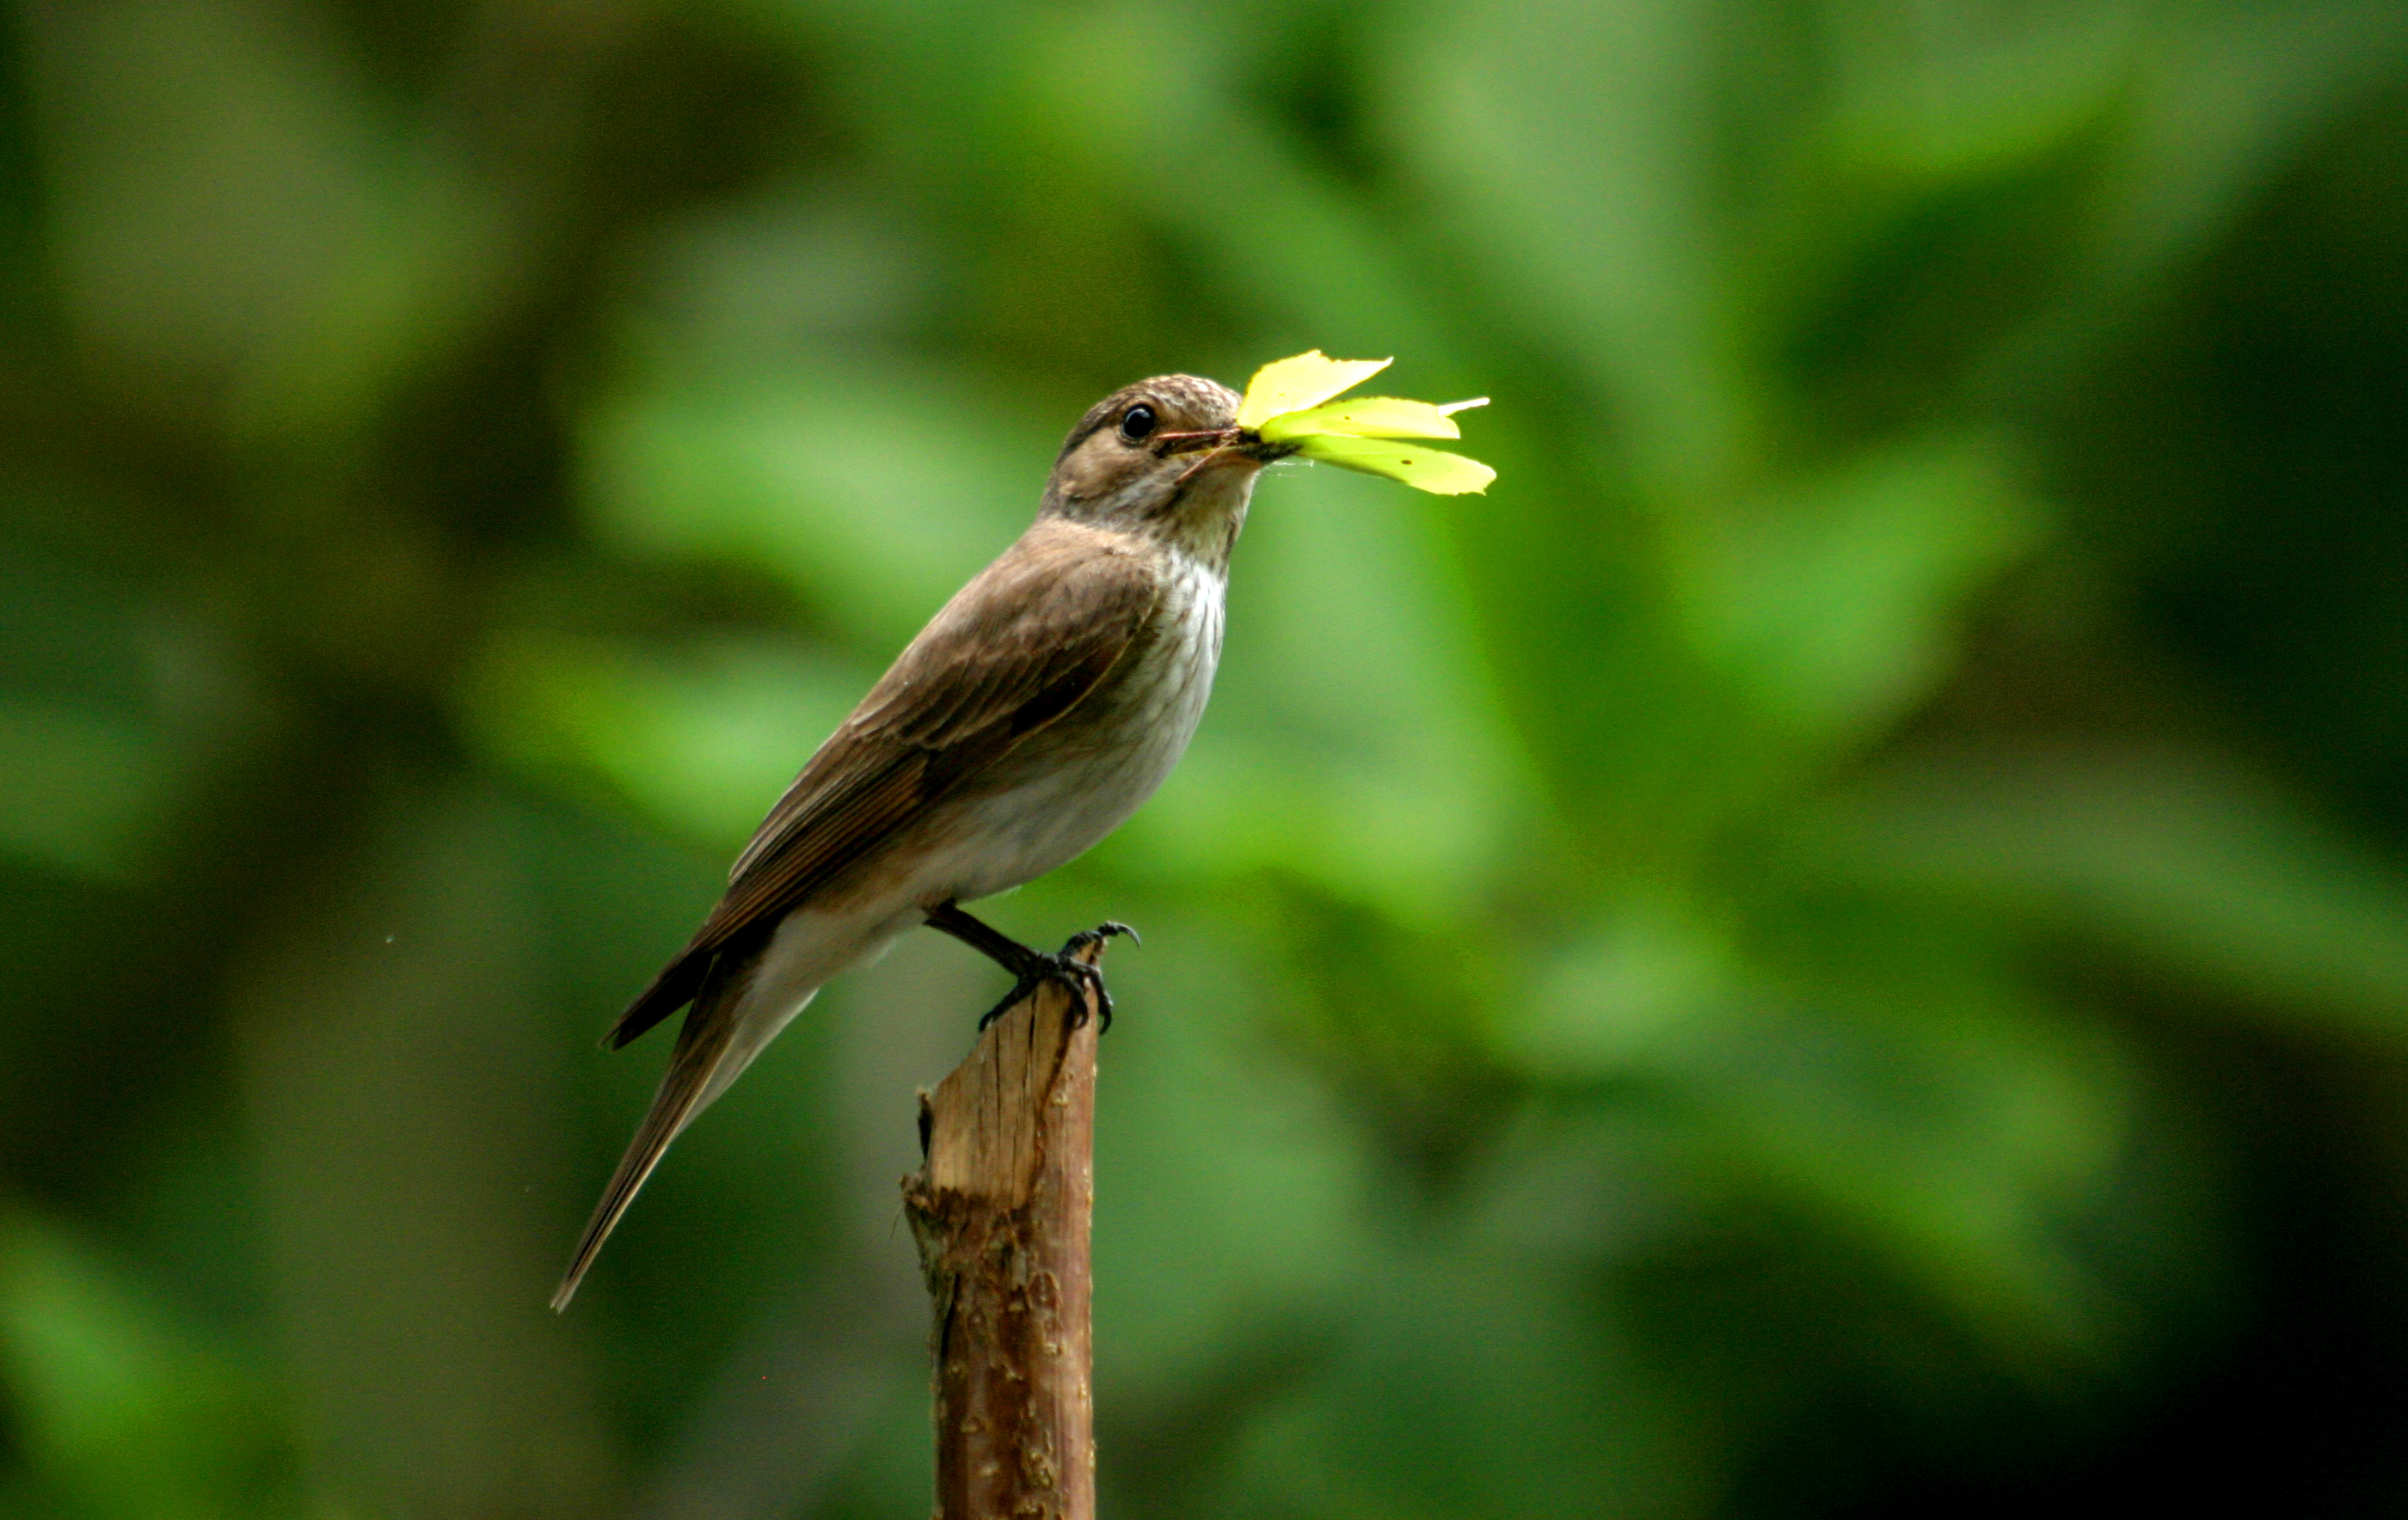

In [18]:
from IPython.display import Image, display

# Specify the path to your image file
image_path = 'bird-1394216.jpg'

# Display the image
display(Image(filename=image_path))

In [19]:
print(is_bird)

('True', tensor(1), tensor([0.0777, 0.9223]))


In [20]:
is_bird = learner.predict("dog-1361477.jpg")

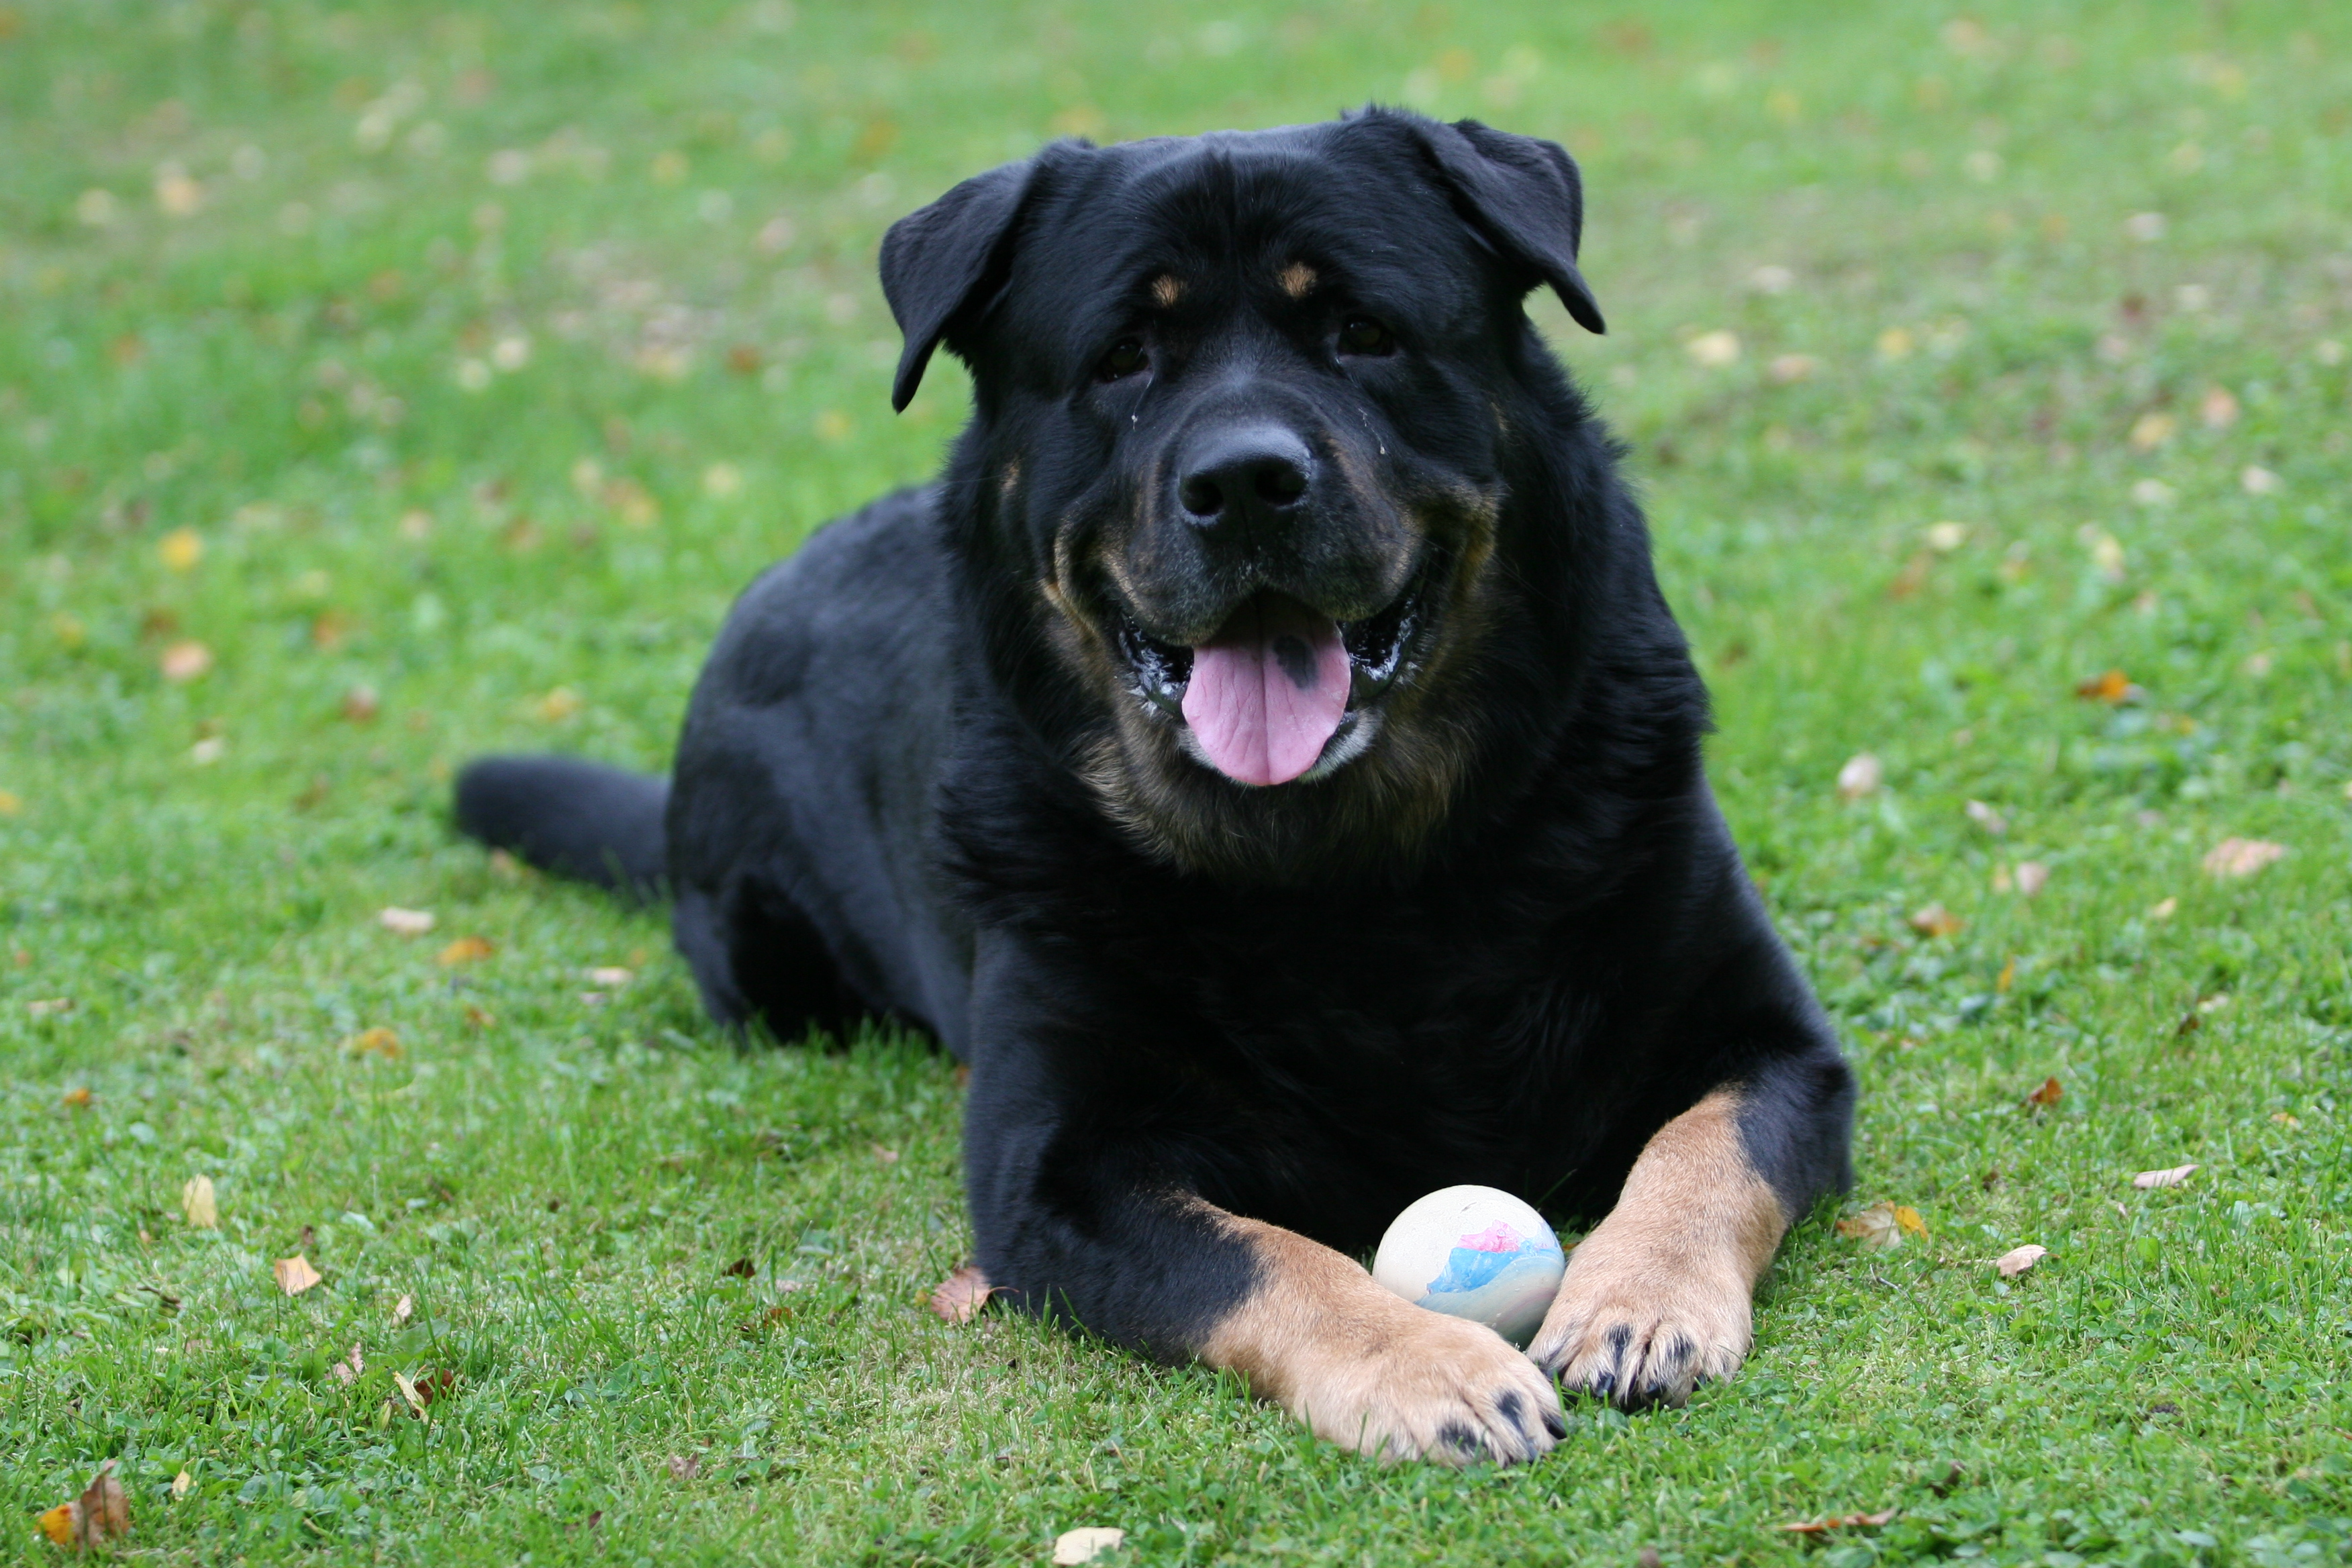

In [24]:
from IPython.display import Image, display

# Specify the path to your image file
image_path = 'dog-1361477.jpg'

# Display the image
display(Image(filename=image_path))

In [25]:
print(is_bird)

('False', tensor(0), tensor([9.9920e-01, 8.0052e-04]))
